In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras.datasets import mnist
import scipy
import math
from keras.utils import np_utils
data = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, Y_train), (X_test, y_test) = data
print(X_train.shape)

(60000, 28, 28)


# **Creating Dense and Activation Layer**

In [ ]:


class Dense(): # fully connected layer 
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size) #shape of weights is (number of neurons in present layer,number of input in that neuron)
        self.bias = np.random.randn(output_size, 1)# shape of bias is number of neurons in present layer  as it act to shift the out put from the origin

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient#w=w-lr*dw
        self.bias -= learning_rate * output_gradient
        return input_gradient

#activation layer
class Activation():
    def __init__(self,activation,activation_d):
        self.activation=activation
        self.activation_d=activation_d
    def forward(self,inputs):
        self.inputs=inputs
        return self.activation(self.inputs)
    def backward(self,grad,learning):
        return np.multiply(grad,self.activation_d(self.inputs))
    
    

# **Loss Function** 

In [ ]:
def mse(out,y):
    return np.mean(np.power(y-out,2))

def mse_d(out,y):
    return 2*(y-out)/(np.size(y))

def binary_cross_entropy(pred,y):
    return np.mean(-y*np.log(pred)-(1-y)*np.log(1-pred))

def binary_cross_entropy_d(pred,y):
    samples=len(pred)
    pred=np.clip(pred,1e-7,1-1e-7)
    return ((1-y)/(1-pred)-y/pred)/np.size(y)
"""def cross_entropy(pred,y):
    samples=len(pred)
    pred=np.clip(pred,1e-3,1-1e-3)
    confidence=np.sum(pred*y,axis=1)
    loss=-np.log(confidence)
    return loss
def cross_entropy_d(pred,y):
    pass"""

'def cross_entropy(pred,y):\n    samples=len(pred)\n    pred=np.clip(pred,1e-3,1-1e-3)\n    confidence=np.sum(pred*y,axis=1)\n    loss=-np.log(confidence)\n    return loss\ndef cross_entropy_d(pred,y):\n    pass'

# **Activation Function**

In [ ]:
#ReLU Activaton function
class ReLu(Activation):
    def __init__(self):
        def relu(Z):
            return np.maximum(0,Z)
        #derivative of ReLU
        def d_relu(z):
            return np.greater(z, 0.).astype(np.float64)
        super().__init__(relu,d_relu)
#Tanh
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        #derivative
        def tanh_d(x):
            return 1 - np.tanh(x) ** 2
        super().__init__(tanh,tanh_d)

            
        
class Softmax():
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
    
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        def d_sigmoid(x):
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        super().__init__(sigmoid,d_sigmoid)

In [ ]:
def preprocess_data(x, y, limit):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [ ]:
x_train, y_train = preprocess_data(X_train, Y_train, 2000)
x_test, y_test = preprocess_data(X_test, y_test,200 )

In [ ]:
y_test.shape

(200, 10, 1)

In [ ]:
y_test[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
def predict(model,out):
    for layers in model:
        out=layers.forward(out)
    return out

def train(model,loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    train_loss=[]
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(model,x)
            # error
            error += loss(y, output)
            # calculate the gradient
            grad = loss_prime(y, output)
            #backward pass
            for layer in reversed(model):
                grad = layer.backward(grad, learning_rate)
        error /= len(x_train)
        train_loss.append(error)
        acc=accuracy(x_train,y_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}, accuracy={acc}")
    
    return train_loss
    

# **Model Architecture**

In [ ]:

network = [
    Dense(28 * 28, 128),
    ReLu(),
    Dense(128,64),
    Tanh(),
    Dense(64,32),
    Tanh(),
    Dense(32, 10),
    Softmax(),
]

# train

hist=train(network,mse, mse_d, x_train, y_train, epochs=300, learning_rate=0.1)

1/300, error=0.13432462214179777, accuracy=0.1775
2/300, error=0.10489566659123464, accuracy=0.2405
3/300, error=0.09505382351177588, accuracy=0.2755
4/300, error=0.08933118651613224, accuracy=0.3185
5/300, error=0.08472577255083397, accuracy=0.275
6/300, error=0.08262497775331713, accuracy=0.2865
7/300, error=0.08006161469790622, accuracy=0.3445
8/300, error=0.07879508528372775, accuracy=0.329
9/300, error=0.07741587856014348, accuracy=0.3605
10/300, error=0.07880785478256724, accuracy=0.3715
11/300, error=0.07614687458069433, accuracy=0.4035
12/300, error=0.07219822845657298, accuracy=0.4085
13/300, error=0.07112335719758356, accuracy=0.414
14/300, error=0.06842950051012014, accuracy=0.456
15/300, error=0.06681916258705911, accuracy=0.504
16/300, error=0.06926570675618728, accuracy=0.4645
17/300, error=0.06784303080491688, accuracy=0.486
18/300, error=0.06297742004146603, accuracy=0.5115
19/300, error=0.062247748011578494, accuracy=0.5425
20/300, error=0.06053943613678031, accuracy=0

In [ ]:
def accuracy(x,y):
    c=0
    for i in range(len(x)):
        if np.argmax(predict(network,x[i]),axis=0)==np.argmax(y[i],axis=0):
            c=c+1
    return c/len(x)

In [ ]:
print("training accuracy after 300 epochs:",accuracy(x_train,y_train))
print("test accuracy after 300 epochs:",accuracy(x_test,y_test))


training accuracy after 300 epochs: 0.802
test accuracy after 300 epochs: 0.7


In [ ]:
np.unique(np.argmax(y_train,axis=1),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([191, 220, 198, 191, 214, 180, 200, 224, 172, 210]))

In [ ]:
np.unique(np.argmax(y_test,axis=1),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([17, 28, 16, 16, 28, 20, 20, 24, 10, 21]))

In [ ]:
def plot_images(data):
    plt.figure(figsize=(6,6))
    plt.imshow(data,cmap="binary")

def show_predictions(data,model):
    plot_images(data)
    x=data.reshape(28*28,1)
    x=x.astype("float32")/255
    out=predict(model,x)
    #print(out)
    print("predicted output:",np.argmax(out,axis=0))



predicted output: [4]


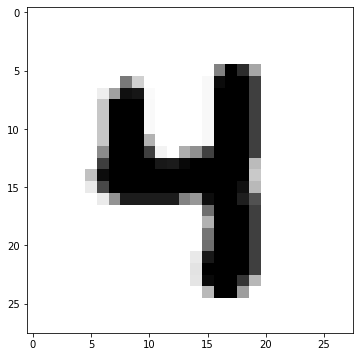

In [ ]:
show_predictions(X_train[58],network)

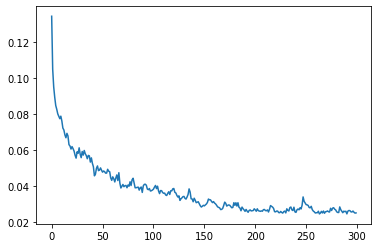

In [ ]:
plt.plot(list(range(300)),hist)